In [1]:
from nsepy import get_history
from datetime import date
import glob
import pandas as pd
import numpy as np
import time

import warnings
warnings.filterwarnings('ignore')

import nsepy

from nsepy import get_history
import tensorflow as tf


In [2]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation


In [3]:
%run -i C:/WS/Project1/kite_hist_data as kite
# C:/Users/Srujan/Downloads/EAI/kite hist data.py

https://kite.trade/connect/login?api_key=3jshozhjv1djt4ak&v=3
https://kite.trade/?action=login&type=login&status=success&request_token=sp9dS2wD9fG7fLxqzUJSAqSUZJCkT3iw
success


In [4]:
instruments = pd.DataFrame(kite.instruments())

In [62]:
dd = instruments[(instruments['tradingsymbol'] == 'NESTLEIND') & (instruments['instrument_type'] == 'EQ')]

dd = dd.head(1)
#             to_date = date.today()

from_date = '2017-03-01'

to_date = '2021-12-22'

ttoken = dd['instrument_token'].item()

dt_stock = kite.historical_data(ttoken, from_date, to_date,'day',0,oi=1)

dt_stock = pd.DataFrame(dt_stock)

dt_stock['Symbol'] = 'NESTLEIND'

In [5]:
#dt_stock.to_csv("data_sbi.csv")

In [6]:
#dt_stock = pd.read_csv("data_sbi_m.csv")

In [197]:
#dt_stock.volume.shift(1)

In [63]:
dt_stock["returns_numeric"] = dt_stock.close - dt_stock.close.shift(1)
dt_stock["returns_percentage"] = (dt_stock.returns_numeric/ dt_stock.close.shift(1))*100
dt_stock["volume_change_numeric"] = dt_stock.volume - dt_stock.volume.shift(1)
dt_stock["volume_change_percentage"] = (dt_stock.volume_change_numeric / dt_stock.volume.shift(1))*100

In [7]:
dt_stock.head()

,date,open,high,low,close,volume,oi,Symbol,returns_numeric,returns_percentage,volume_change_numeric,volume_change_percentage
0,2017-03-01 00:00:00+05:30,6285.95,6285.95,6216.00,6221.55,851,0,NESTLEIND,NaN,NaN,NaN,NaN
1,2017-03-02 00:00:00+05:30,6294.30,6294.30,6150.25,6180.00,843,0,NESTLEIND,-41.55,-0.667840,-8.0,-0.940071
2,2017-03-03 00:00:00+05:30,6185.00,6204.40,6150.00,6175.00,477,0,NESTLEIND,-5.00,-0.080906,-366.0,-43.416370
3,2017-03-06 00:00:00+05:30,6188.00,6292.65,6169.00,6270.00,1502,0,NESTLEIND,95.00,1.538462,1025.0,214.884696
4,2017-03-07 00:00:00+05:30,6274.35,6378.55,6192.00,6353.95,3271,0,NESTLEIND,83.95,1.338915,1769.0,117.776298


In [64]:
dt_stock = dt_stock.dropna()

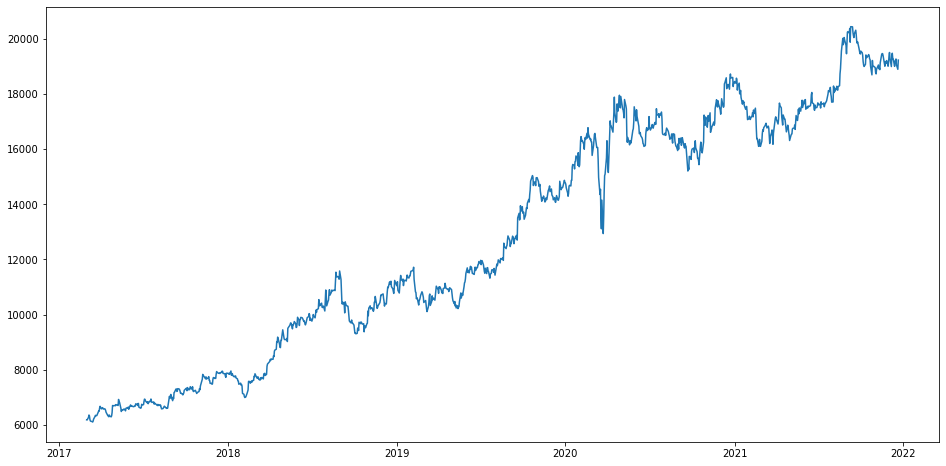

In [65]:
#setting index as date
dt_stock['date'] = pd.to_datetime(dt_stock.date,format='%Y-%m-%d')
dt_stock.index = dt_stock['date']

#plot
plt.figure(figsize=(16,8))
plt.plot(dt_stock['close'][0:len(dt_stock.close)-1], label='Close Price history')

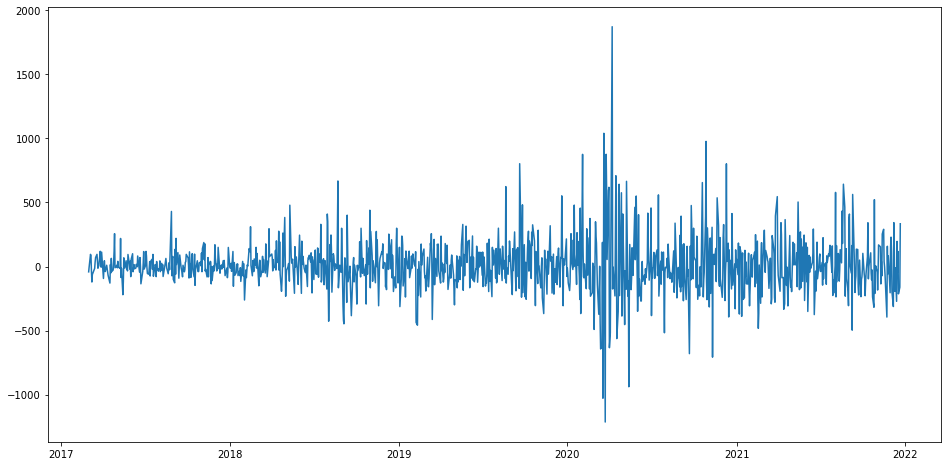

In [10]:
#setting index as date
dt_stock['date'] = pd.to_datetime(dt_stock.date,format='%Y-%m-%d')
dt_stock.index = dt_stock['date']

#plot
plt.figure(figsize=(16,8))
plt.plot(dt_stock['returns_numeric'][0:len(dt_stock.returns_numeric)-1], label='Returns Price history')

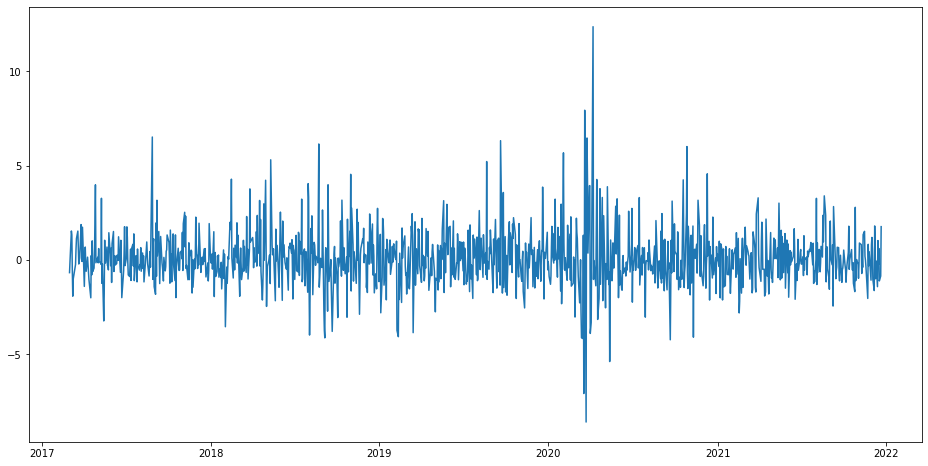

In [11]:
#setting index as date
dt_stock['date'] = pd.to_datetime(dt_stock.date,format='%Y-%m-%d')
dt_stock.index = dt_stock['date']

#plot
plt.figure(figsize=(16,8))
plt.plot(dt_stock['returns_percentage'][0:len(dt_stock.returns_numeric)-1], label='Returns Percentage history')

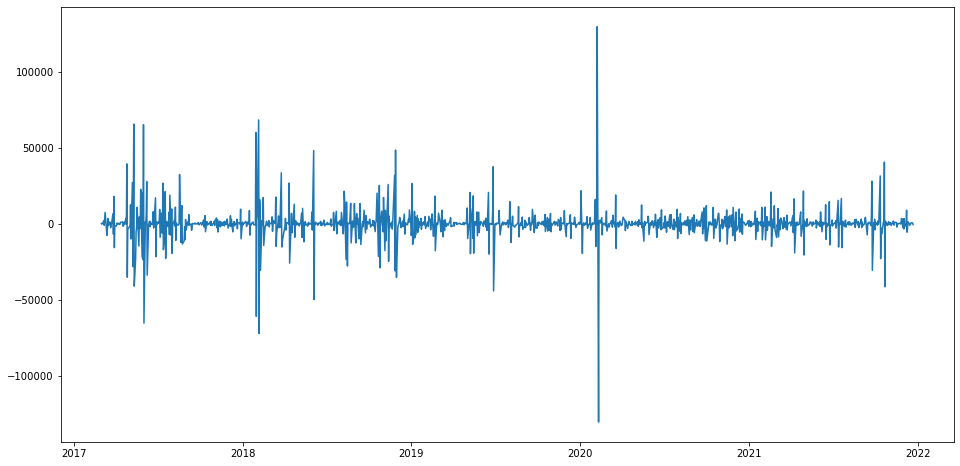

In [12]:
#setting index as date
dt_stock['date'] = pd.to_datetime(dt_stock.date,format='%Y-%m-%d')
dt_stock.index = dt_stock['date']

#plot
plt.figure(figsize=(16,8))
plt.plot(dt_stock['volume_change_numeric'][0:len(dt_stock.returns_numeric)-1], label='volume change history')

In [67]:
dt_stock["2D_SMA"]= dt_stock['close'].rolling(2).mean()
dt_stock["3D_SMA"]= dt_stock['close'].rolling(3).mean()
dt_stock["7D_SMA"]= dt_stock['close'].rolling(7).mean()
dt_stock["21D_SMA"]= dt_stock['close'].rolling(21).mean()
dt_stock["90D_SMA"]= dt_stock['close'].rolling(90).mean()
dt_stock["Expanding_Mean"] = dt_stock['close'].expanding().mean()
dt_stock["3D_Var"] = dt_stock['close'].rolling(3).var()
dt_stock["7D_Var"] = dt_stock['close'].rolling(7).var()
dt_stock["21D_Var"] = dt_stock['close'].rolling(21).var()
dt_stock["90D_Var"] = dt_stock['close'].rolling(90).var()
dt_stock["Expanding_Var"] = dt_stock['close'].expanding().var()
dt_stock["C_O_Diff"] = dt_stock["close"] - dt_stock["open"]
dt_stock["3D_EMA"]= dt_stock['close'].ewm(span=3,adjust=False).mean()
dt_stock['7D_EMA'] = dt_stock.close.ewm(span=7,adjust=False).mean()
dt_stock['21D_EMA'] = dt_stock.close.ewm(span=21,adjust=False).mean()
dt_stock['90D_EMA'] = dt_stock.close.ewm(span=90,adjust=False).mean()

In [15]:
#dt_stock.to_csv("nestle_newdata.csv")

In [69]:
dt_stock['class'] = 1

In [75]:
dt_stock.loc[(dt_stock.returns_percentage<0),"class"]=0

In [77]:
#dt_stock[["class","returns_percentage"]]

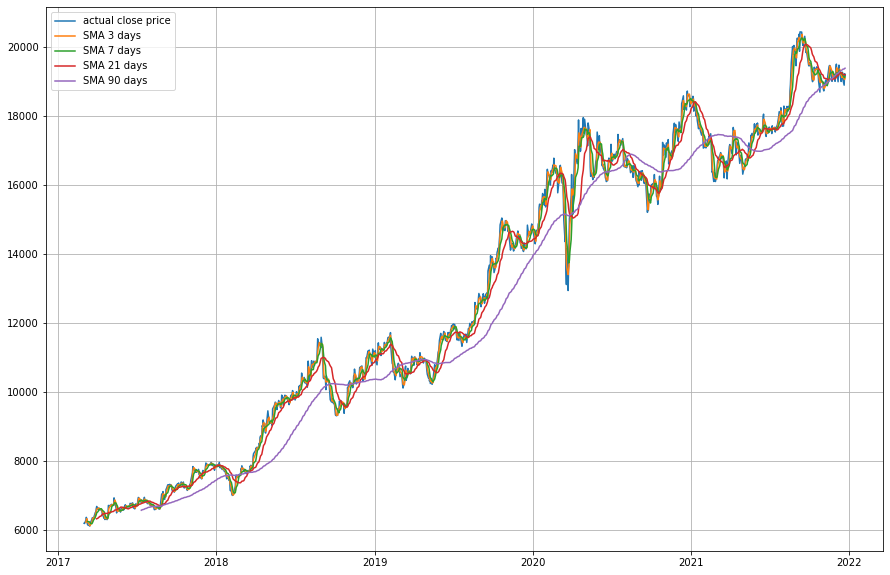

In [78]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(dt_stock['close'],label='actual close price')
#plt.plot(dt_stock['2D_SMA'],label='SMA 2 days')
plt.plot(dt_stock['3D_SMA'],label='SMA 3 days')
plt.plot(dt_stock['7D_SMA'],label='SMA 7 days')
plt.plot(dt_stock['21D_SMA'],label='SMA 21 days')
plt.plot(dt_stock['90D_SMA'],label='SMA 90 days')
plt.legend(loc=2)

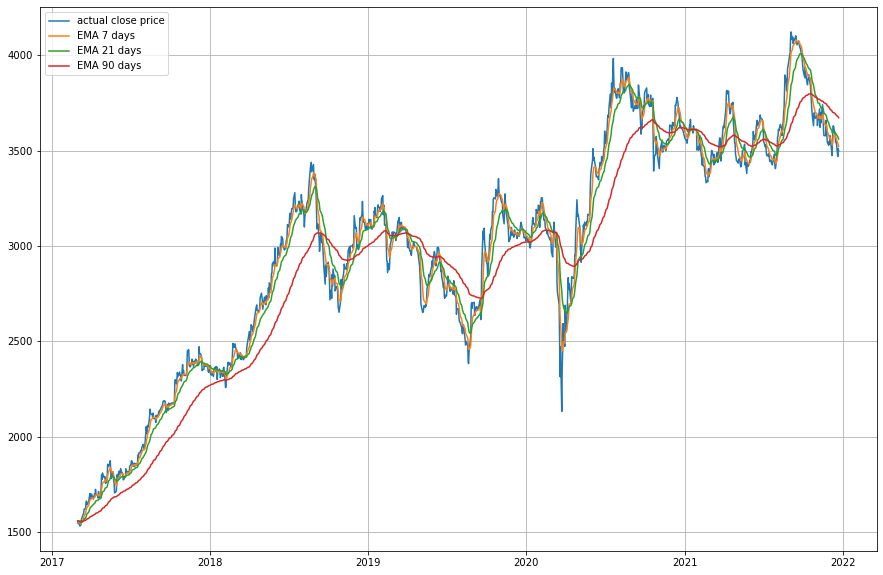

In [384]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(dt_stock['close'],label='actual close price')
plt.plot(dt_stock['7D_EMA'],label='EMA 7 days')
plt.plot(dt_stock['21D_EMA'],label='EMA 21 days')
plt.plot(dt_stock['90D_EMA'],label='EMA 90 days')
plt.legend(loc=2)

<AxesSubplot:xlabel='date'>

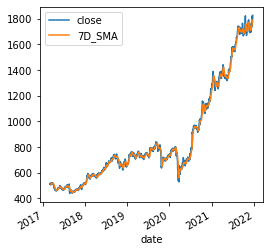

In [168]:
#figure, axis = plt.subplots(1, 2)
dt_stock[['close', '7D_SMA']].plot(label='SBI', figsize=(4, 4))


<AxesSubplot:xlabel='date'>

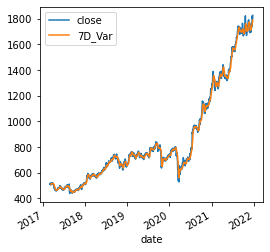

In [169]:
dt_stock[['close', '7D_Var']].plot(label='SBI', figsize=(4, 4))

In [170]:
dt_stock.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'oi', 'Symbol',
       'returns_numeric', 'returns_percentage', 'volume_change_numeric',
       'volume_change_percentage', '7D_SMA', '21D_SMA', '90D_SMA',
       'Expanding_Mean', '7D_Var', '21D_Var', '90D_Var', 'Expanding_Var',
       'C_O_Diff', '7D_EMA', '21D_EMA', '90D_EMA'],
      dtype='object')

In [105]:
dt_stock["class"].value_counts()

1    559
0    543
Name: class, dtype: int64

# unscaled

In [97]:
#creating dataframe unscaled
'''data = dt_stock.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(dt_stock)),columns=['date', 'close','volume'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['close'][i] = data['close'][i]
    new_data['volume'][i] = data['volume'][i]


#setting index
print(new_data.shape)
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)
print(new_data.shape)

#creating train and test sets
dataset = new_data.values
print(dataset.shape)



#print(len(valid))
#converting dataset into x_train and y_train
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = scaler.fit_transform(dataset)

train = dataset[0:int(len(dataset)*0.7),:]
print("train shape",train.shape)
valid = dataset[int(len(dataset)*0.7):,:]

x_train, y_train = [], []
for i in range(90,len(train)):
    x_train.append(train[i-90:i,])
    y_train.append(train[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

print("x-train 90 days shape",x_train.shape)
print("y-shape 90 days shape",y_train.shape)

    
x_test, y_test = [], []
for i in range(90,len(valid)):
    x_test.append(valid[i-90:i,])
    y_test.append(valid[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

#x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print("x-test 90 days shape",x_test.shape)
print("y-test 90 days shape",y_test.shape)


x_train1 = np.reshape(x_train[0],(1,-1))
for i in range(1,len(x_train)):
    r1 = np.reshape(x_train[i],(1,-1))
    #r2 = np.reshape(x_train[1],(1,-1))
    x_train1 = np.vstack((x_train1,r1))
pd.DataFrame(x_train1).to_csv("train_data_unscaled_lstm.csv")
print(pd.DataFrame(x_train1).head(3))
print("x-train1 90 days shape",x_train1.shape)
#print("x-train1 90 days head ",x_train1.head())
print("y-shape 90 days shape",y_train.shape)


x_test1 = np.reshape(x_test[0],(1,-1))
for i in range(1,len(x_test)):
    r1 = np.reshape(x_test[i],(1,-1))
    #r2 = np.reshape(x_train[1],(1,-1))
    x_test1 = np.vstack((x_test1,r1))
x_test.shape
pd.DataFrame(x_test1).to_csv("test_data_unscaled_lstm.csv")

#print(pd.DataFrame(x_test).head(3))
print("x-test1 90 days shape",x_test.shape)
print("y-test 90 days shape",y_test.shape) '''


'data = dt_stock.sort_index(ascending=True, axis=0)\nnew_data = pd.DataFrame(index=range(0,len(dt_stock)),columns=[\'date\', \'close\',\'volume\'])\nfor i in range(0,len(data)):\n    new_data[\'date\'][i] = data[\'date\'][i]\n    new_data[\'close\'][i] = data[\'close\'][i]\n    new_data[\'volume\'][i] = data[\'volume\'][i]\n\n\n#setting index\nprint(new_data.shape)\nnew_data.index = new_data.date\nnew_data.drop(\'date\', axis=1, inplace=True)\nprint(new_data.shape)\n\n#creating train and test sets\ndataset = new_data.values\nprint(dataset.shape)\n\n\n\n#print(len(valid))\n#converting dataset into x_train and y_train\n#scaler = MinMaxScaler(feature_range=(0, 1))\n#scaled_data = scaler.fit_transform(dataset)\n\ntrain = dataset[0:int(len(dataset)*0.7),:]\nprint("train shape",train.shape)\nvalid = dataset[int(len(dataset)*0.7):,:]\n\nx_train, y_train = [], []\nfor i in range(90,len(train)):\n    x_train.append(train[i-90:i,])\n    y_train.append(train[i,0])\nx_train, y_train = np.array(x_t

# scaled

In [99]:
#creating dataframe scaled
dt_stock = dt_stock.dropna()
no_features = 9
data = dt_stock.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(dt_stock)),columns=['date', 'class','close','volume','3D_SMA','7D_SMA','3D_EMA','7D_EMA','3D_Var','7D_Var','C_O_Diff'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['class'][i] = data['class'][i]
    new_data['close'][i] = data['close'][i]
    new_data['volume'][i] = data['volume'][i]
    #new_data['volume_change_percentage'][i] = data['volume_change_percentage'][i]
    new_data['3D_SMA'][i] = data['7D_SMA'][i]
    new_data['7D_SMA'][i] = data['7D_SMA'][i]
    new_data['3D_EMA'][i] = data['3D_EMA'][i]
    new_data['7D_EMA'][i] = data['7D_EMA'][i]
    new_data['3D_Var'][i] = data['3D_Var'][i]
    new_data['7D_Var'][i] = data['7D_Var'][i]
    new_data['C_O_Diff'][i] = data['C_O_Diff'][i]





#setting index
#print(new_data.shape)
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)
print("data shape",new_data.shape)

#creating train and test sets
dataset = new_data.values
#print(dataset.shape)



#print(len(valid))
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print("Scaling done")
train = scaled_data[0:int(len(scaled_data)*0.7),:]
print("train shape",train.shape)
valid = scaled_data[int(len(scaled_data)*0.7):,:]
print("test shape",valid.shape)


x_train, y_train = [], []
for i in range(7,len(train)):
    x_train.append(train[i-7:i,])
    y_train.append(train[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

print("x-train 7 days shape",x_train.shape)
print("y-shape 7 days shape",y_train.shape)

    
x_test, y_test = [], []
for i in range(7,len(valid)):
    x_test.append(valid[i-7:i,])
    y_test.append(valid[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

#x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print("x-test 7 days shape",x_test.shape)
print("y-test 7 days shape",y_test.shape)


x_train1 = np.reshape(x_train[0],(1,-1))
for i in range(1,len(x_train)):
    r1 = np.reshape(x_train[i],(1,-1))
    #r2 = np.reshape(x_train[1],(1,-1))
    x_train1 = np.vstack((x_train1,r1))
#pd.DataFrame(x_train1).to_csv("train_data_lstm.csv")
#print(pd.DataFrame(x_train1).head(3))
print("x-train1 7 days shape",x_train1.shape)
#print("x-train1 90 days head ",x_train1.head())
print("y-shape 7 days shape",y_train.shape)
print("y-train 7 days head ",y_train[0:2])


x_test1 = np.reshape(x_test[0],(1,-1))
for i in range(1,len(x_test)):
    r1 = np.reshape(x_test[i],(1,-1))
    #r2 = np.reshape(x_train[1],(1,-1))
    x_test1 = np.vstack((x_test1,r1))
#x_test.shape
#pd.DataFrame(x_test1).to_csv("test_data_lstm.csv")
#print(pd.DataFrame(x_test1).head(2))
#print(pd.DataFrame(x_test).head(3))
print("x-test1 7 days shape",x_test1.shape)
print("y-test 7 days shape",y_test.shape)


x_train1 = np.reshape(x_train1, (x_train1.shape[0],x_train1.shape[1],1))
print("x-train1 7 days reshaped",x_train1.shape)

y_train = np.reshape(y_train, (y_train.shape[0],1,1))
print("y_train 7 days reshaped",y_train.shape)

data shape (1102, 10)
Scaling done
train shape (771, 10)
test shape (331, 10)
x-train 7 days shape (764, 7, 10)
y-shape 7 days shape (764,)
x-test 7 days shape (324, 7, 10)
y-test 7 days shape (324,)
x-train1 7 days shape (764, 70)
y-shape 7 days shape (764,)
y-train 7 days head  [0. 1.]
x-test1 7 days shape (324, 70)
y-test 7 days shape (324,)
x-train1 7 days reshaped (764, 70, 1)
y_train 7 days reshaped (764, 1, 1)


In [80]:
x_train1.shape, x_test1.shape

((764, 70, 1), (324, 70))

# Model

In [108]:
# create and fit the LSTM network
'''model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train1.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(tf.convert_to_tensor(x_train1), tf.convert_to_tensor(y_train), epochs=20, batch_size=50, verbose=2)'''



model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train1.shape[1],1)))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.BinaryAccuracy()])
print(model.summary())
model.fit(tf.convert_to_tensor(x_train1), tf.convert_to_tensor(y_train), validation_data=(tf.convert_to_tensor(x_test1), tf.convert_to_tensor(y_test)), epochs=100, batch_size=64)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 70, 64)            16896     
                                                                 
 lstm_17 (LSTM)              (None, 64)                33024     
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 54,145
Trainable params: 54,145
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
12/12 [==========================

12/12 [==============================] - 1s 79ms/step - loss: 0.6547 - binary_accuracy: 0.5903 - val_loss: 0.8291 - val_binary_accuracy: 0.5093
Epoch 99/100
12/12 [==============================] - 1s 78ms/step - loss: 0.6589 - binary_accuracy: 0.5929 - val_loss: 0.7509 - val_binary_accuracy: 0.5154
Epoch 100/100
12/12 [==============================] - 1s 78ms/step - loss: 0.6547 - binary_accuracy: 0.5982 - val_loss: 0.7865 - val_binary_accuracy: 0.5031


In [109]:
score, acc = model.evaluate(x_test1, y_test)
print(score)
acc

11/11 [==============================] - 1s 12ms/step - loss: 0.7865 - binary_accuracy: 0.5031
0.7864705920219421


0.5030864477157593

In [1]:
'''NUM_NEURONS_FirstLayer = 128
NUM_NEURONS_SecondLayer = 64
NUM_NEURONS_ThirdLayer = 16

EPOCHS = 220
#Build the model
model = Sequential()
model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(x_train1.shape[1],1),activation="tanh", return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1),activation="tanh"))
#model.add(LSTM(NUM_NEURONS_ThirdLayer,input_shape=(NUM_NEURONS_SecondLayer,1)))
model.add(Dense(1))


x_train1=np.asarray(x_train1).astype(np.float64)
#x_test=np.asarray(x_test).astype(np.float64)
y_train=np.asarray(y_train).astype(np.float64)
#y_test=np.asarray(y_test).astype(np.float64)


model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(tf.convert_to_tensor(x_train1), tf.convert_to_tensor(y_train), epochs=20, batch_size=50, verbose=2)'''

'NUM_NEURONS_FirstLayer = 128\nNUM_NEURONS_SecondLayer = 64\nNUM_NEURONS_ThirdLayer = 16\n\nEPOCHS = 220\n#Build the model\nmodel = Sequential()\nmodel.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(x_train1.shape[1],1),activation="tanh", return_sequences=True))\nmodel.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1),activation="tanh"))\n#model.add(LSTM(NUM_NEURONS_ThirdLayer,input_shape=(NUM_NEURONS_SecondLayer,1)))\nmodel.add(Dense(1))\n\n\nx_train1=np.asarray(x_train1).astype(np.float64)\n#x_test=np.asarray(x_test).astype(np.float64)\ny_train=np.asarray(y_train).astype(np.float64)\n#y_test=np.asarray(y_test).astype(np.float64)\n\n\nmodel.compile(loss=\'mean_absolute_error\', optimizer=\'adam\')\nmodel.fit(tf.convert_to_tensor(x_train1), tf.convert_to_tensor(y_train), epochs=20, batch_size=50, verbose=2)'

In [210]:
y_pred = model.predict(x_train1)
print(y_pred.shape)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0


(764, 1)


In [211]:
a = y_train.reshape(y_train.shape[0],1)


In [212]:
from sklearn.metrics import confusion_matrix

confusion_matrix =confusion_matrix(a, y_pred)
confusion_matrix

array([[213, 159],
       [141, 251]], dtype=int64)

In [219]:
(213+251)/(213+159+141+251)

0.6073298429319371

In [213]:
from sklearn.metrics import confusion_matrix

tp, fn, fp, tn = confusion_matrix(a,y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
#matrix = classification_report(a,y_pred,labels=[1,0])
#print('Classification report : \n',matrix)

Outcome values : 
 251 141 159 213


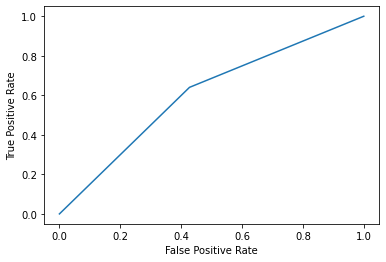

In [214]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(a,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [215]:
from sklearn.metrics import roc_auc_score, roc_curve

# ROC Function
def plot_roc_curve(Y_test, model_probs):

    random_probs = [0 for _ in range(len(Y_test))]
    # calculate AUC
    model_auc = roc_auc_score(Y_test, model_probs)
    # summarize score
    print('Model: ROC AUC=%.3f' % (model_auc))
    # calculate ROC Curve
        # For the Random Model
    random_fpr, random_tpr, _ = roc_curve(Y_test, random_probs)
        # For the actual model
    model_fpr, model_tpr, _ = roc_curve(Y_test, model_probs)
    # Plot the roc curve for the model and the random model line
    plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
    plt.plot(model_fpr, model_tpr, marker='.', label='Model')
    # Create labels for the axis
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

Model: ROC AUC=0.606


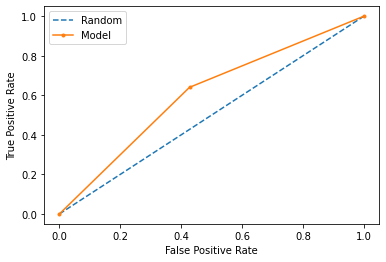

In [216]:
plot_roc_curve(a,y_pred)

In [203]:
closing_price = model.predict(x_test1)
print(closing_price.shape)


(324, 1)


In [204]:
y_pred = model.predict(x_test1)
print(y_pred.shape)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0


(324, 1)


In [205]:
a = y_test.reshape(y_test.shape[0],1)


In [206]:
from sklearn.metrics import confusion_matrix

confusion_matrix =confusion_matrix(a, y_pred)
confusion_matrix

array([[139,  23],
       [138,  24]], dtype=int64)

In [220]:
#pd.DataFrame(np.array(a),np.array(y_pred))


In [435]:
actual_pred = pd.DataFrame(closing_price, a)
actual_pred.to_csv("actual_pred_testdata_ReturnsPrecentage_Nestle_7Days_ManyFeatures_LSTMmodel.csv")